<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2021</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Monday, April 19 • 8:00 - 9:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://swung.slack.com/archives/C01T5V5S9EV">#t21-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://youtu.be/w3pu0H3dXe8">https://youtu.be/w3pu0H3dXe8</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

# Modeling the 2D heat equation

## Loading the mesh

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-notebook")
# %config InlineBackend.figure_format='svg'
import pygimli as pg
from pygimli.viewer import showMesh

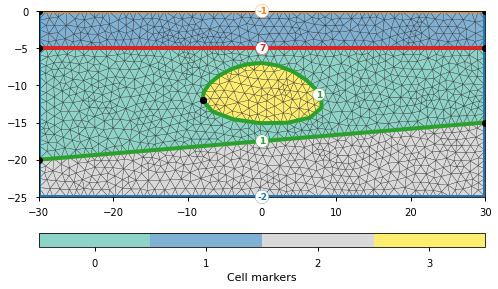

In [6]:
mesh = pg.load("data/mesh.bms")
showMesh(mesh, markers=True, showMesh=True);

## The equation level

Now we solve the heat equation
$$ \nabla (a \cdot \nabla T) = f $$
for the unknown temperature $T$ in dependence of a thermal diffusivity $a$ and a heat source $f$.
We solve on the mesh we created in notebook 1. The parameter $a$ needs to be known on the whole mesh. Therefore we create a map that associates an $a$ value for every model region 0-3 and have a look at it:

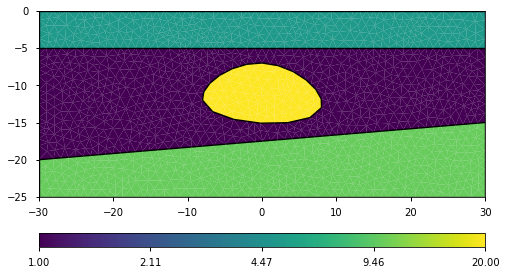

In [3]:
amap = [[0, 1.0], [1, 5.0], [2, 10.0], [3, 20.0]] #marker, value
showMesh(mesh, amap, logScale=True);

## The finite-element solver
`pg.solve` solves a partial differential equation using the function [`solveFiniteElement`](https://www.pygimli.org/pygimliapi/_generated/pygimli.solver.html?highlight=solvefiniteelement#pygimli.solver.solveFiniteElements). 

Instead of a heat source, we fix temperatures at the boundaries (bc) using Dirichlet boundary conditions.

Mesh:  Mesh: Nodes: 1386 Cells: 2627 Boundaries: 4012
Assembling time:  0.026
Solving time:  0.007


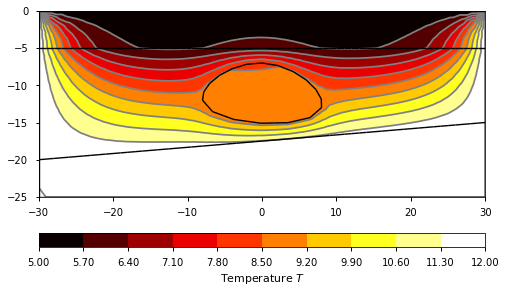

In [5]:
bc={'Dirichlet':{-1:5.0, -2:12.0}}
#bc={'Dirichlet':{-1:20.0}, 'Neumann': {-2:0.0}}, 
T = pg.solver.solve(mesh, a=amap, bc=bc, verbose=True)
showMesh(mesh, data=T, label='Temperature $T$', cMap="hot",
         nLevs=11, showBoundary=True);

We are now interested in the stream lines of the heat flow. Therefore we return the temperature axis and draw the streams on top of it with `drawStreams` . Any other MPL plots could go here.

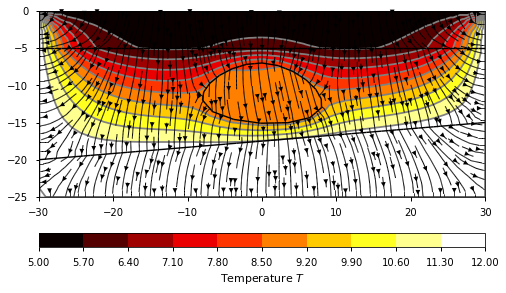

In [6]:
from pygimli.viewer.mpl import drawStreams
ax, cb = showMesh(mesh, data=T, label='Temperature $T$', cMap="hot",
                  nLevs=11, showBoundary=True);
drawStreams(ax, mesh, T)

Text(0, 0.5, 'Depth')

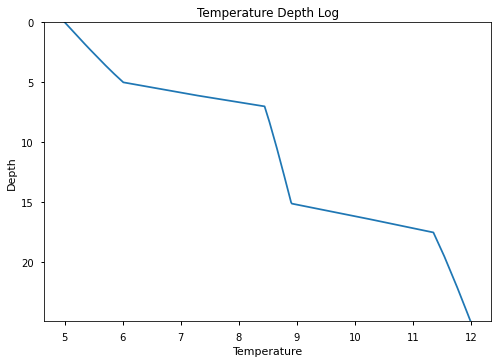

In [14]:
# produce a temperature depth log (copy)
depth = np.arange(0, 25, 0.1)
pos = [[0, -d] for d in depth]
Tlog = pg.interpolate(mesh, T, pos)
fig, ax = plt.subplots()
ax.plot(Tlog, depth)
ax.set_ylim([max(depth), 0])
ax.set_title('Temperature Depth Log')
ax.set_xlabel('Temperature')
ax.set_ylabel('Depth')

### Numerical accuracy
We could improve the solution by using a finer mesh

Mesh:  Mesh: Nodes: 5398 Cells: 10508 Boundaries: 15905
Assembling time:  0.081
Solving time:  0.02


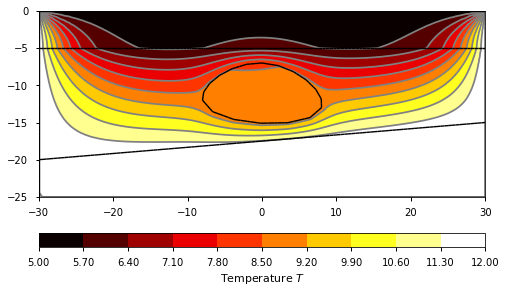

In [15]:
meshH = mesh.createH2()
Th2 = pg.solver.solve(meshH, a=amap, bc=bc, verbose=True)
showMesh(meshH, data=Th2, label='Temperature $T$', cMap="hot",
         nLevs=11, showBoundary=True);

Mesh:  Mesh: Nodes: 5398 Cells: 2627 Boundaries: 4012
Assembling time:  0.058
Solving time:  0.038


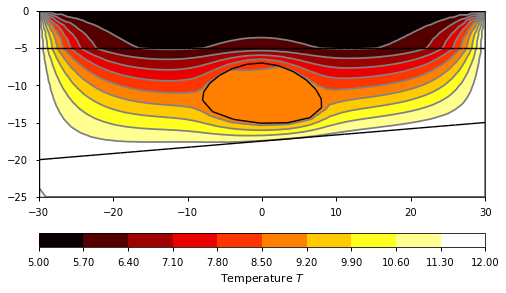

In [16]:
meshP = mesh.createP2()
Tp2 = pg.solver.solve(meshP, a=amap, bc=bc, verbose=True)
showMesh(meshP, data=Tp2, label='Temperature $T$', cMap="hot",
         nLevs=11, showBoundary=True);

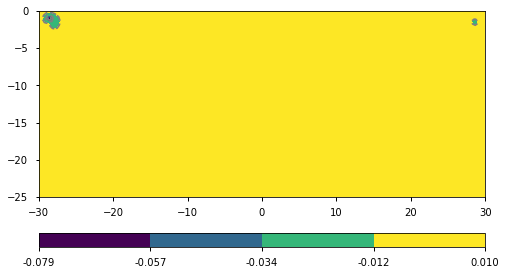

In [17]:
pg.show(meshH, Th2-Tp2);